In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# Reading input

articles = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/articles.csv')
customers = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/customers.csv')
transactions_train = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv')

In [13]:
pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/articles.csv', nrows = 3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [12]:
pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/customers.csv', nrows = 3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [15]:
pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv', nrows = 3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2


In [16]:
# articles = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/articles.csv')
# customers = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/customers.csv')
transactions_train = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv')

In [17]:
transactions_train.shape

(31788324, 5)

In [18]:
transactions_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
article_id,31788324.0,6.962272e+08,1.334480e+08,1.087750e+08,6.328030e+08,7.145820e+08,7.865240e+08,9.562170e+08
price,31788324.0,2.782927e-02,1.918113e-02,1.694915e-05,1.581356e-02,2.540678e-02,3.388136e-02,5.915254e-01
sales_channel_id,31788324.0,1.704028e+00,4.564786e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00


In [19]:
transactions_train.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [54]:
transactions_train['t_dat'].max(), transactions_train['t_dat'].min()

('2020-09-22', '2018-09-20')

In [21]:
cust_multiple_visits = transactions_train.groupby('customer_id').agg({'t_dat':'nunique'}).reset_index()

In [23]:
cust_multiple_visits['t_dat'].max(), cust_multiple_visits['t_dat'].min()

(427, 1)

In [24]:
cust_multiple_visits.sort_values('t_dat', ascending=False).head()

,customer_id,t_dat
885174,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,427
1283457,f137c16fd175271922dad4006565503952f24750a57388...,391
755132,8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d...,390
641270,788785852eddb5874f924603105f315d69571b3e5180f3...,322
1209601,e34f8aa5e7c8c258523ea3e5f5f13168b6c21a9e8bffcc...,318


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='t_dat', ylabel='Count'>

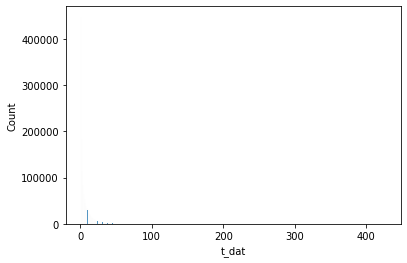

In [31]:
sns.histplot(cust_multiple_visits['t_dat'])

In [68]:
cust_multiple_visits.groupby('t_dat').agg({'customer_id':'count'}).sort_values('customer_id',ascending=False)

,customer_id
t_dat,
1,447973
2,183116
3,113869
4,83255
5,65301
...,...
206,1
211,1
215,1


<AxesSubplot:ylabel='Count'>

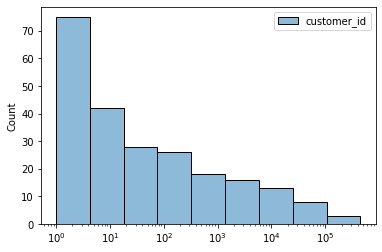

In [67]:
sns.histplot(cust_multiple_visits.groupby('t_dat').agg({'customer_id':'count'}), log_scale=True)

In [75]:
np.percentile(cust_multiple_visits[cust_multiple_visits['t_dat'] > 10]['t_dat'], 0.99)

11.0

In [77]:
customer_group = cust_multiple_visits[(cust_multiple_visits['t_dat'] > 1) & (cust_multiple_visits['t_dat'] <= 50 )]['customer_id']

In [78]:
customer_group.shape

(904637,)

In [79]:
selected_customers = pd.merge(transactions_train,customer_group, 
                              left_on = 'customer_id',
                              right_on = 'customer_id',
                              how = 'inner'
                              
                             )

In [80]:
import gc
del transactions_train
gc.collect()

3394

In [85]:
selected_customers['prod_count'] = selected_customers.groupby('customer_id')['article_id'].transform('nunique')

In [86]:
selected_customers.head()

,t_dat,customer_id,article_id,price,sales_channel_id,prod_count
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,14
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,14
2,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,14
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2,14
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,723529001,0.025407,2,14


In [87]:
selected_customers[['prod_count']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
prod_count,27977978.0,63.476325,56.045803,1.0,24.0,48.0,85.0,742.0


In [94]:
selected_customers['article_id'].nunique()

103547

In [96]:
np.percentile(selected_customers[['prod_count']], 95)

172.0

In [97]:
selected_customers = selected_customers[selected_customers['prod_count'].between(2,172)]

In [99]:
selected_customers['customer_id'].nunique()

894949